In [95]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
import os
path="C:/Users/aouam/Downloads/Python/Premier league"
selected_data=[]
for file in os.listdir(path):
    if file.endswith('.csv'):
        file_path=os.path.join(path,file)
        data=pd.read_csv(file_path)
        team_name=os.path.splitext(file)[0]
        data['Team']=team_name
        selected_data.append(data)
df=pd.concat(selected_data,ignore_index=True) # Since the ignore_index=True the index will be reset (0,1,2...)
df.head(10)

,Date,Opponent,Is_Home,Result,Goals,Opponent_Goals,Possession,Shots,Shots_On_Target,Passes_Completed,...,Opponent_Crosses,Opponent_Fouls,Opponent_Offsides,Shot_Efficiency,Season,Month,Day_of_Week,Last5_Avg_Goals,Last5_Win_Rate,Team
0,2013-08-04 18:20:00,Galatasaray,1,-1,1,2,55,12,5,425,...,3,15,2,0.416667,2013,8,7,1.000000,0.00,Arsenal
1,2013-08-17 17:00:00,Aston Villa,1,-1,1,3,64,15,4,457,...,2,19,1,0.266667,2013,8,6,1.000000,0.00,Arsenal
2,2013-08-21 21:45:00,Fenerbahçe,0,1,3,0,60,13,7,451,...,2,15,1,0.538462,2013,8,3,1.666667,0.33,Arsenal
3,2013-08-24 14:45:00,Fulham,0,1,3,1,54,19,9,496,...,1,10,3,0.473684,2013,8,6,2.000000,0.50,Arsenal
4,2013-08-27 21:45:00,Fenerbahçe,1,1,2,0,65,14,6,460,...,4,16,1,0.428571,2013,8,2,2.000000,0.60,Arsenal
5,2013-09-01 18:00:00,Tottenham,1,1,1,0,43,12,5,305,...,4,14,0,0.416667,2013,9,7,2.000000,0.60,Arsenal
6,2013-09-14 17:00:00,Sunderland,0,1,3,1,69,14,6,588,...,7,13,4,0.428571,2013,9,6,2.400000,0.80,Arsenal
7,2013-09-18 21:45:00,Marseille,0,1,2,1,50,13,6,426,...,3,0,0,0.461538,2013,9,3,2.200000,1.00,Arsenal
8,2013-09-22 15:30:00,Stoke City,1,1,3,1,50,17,9,459,...,6,14,1,0.529412,2013,9,7,2.200000,1.00,Arsenal
9,2013-09-25 22:00:00,West Bromwich,0,0,1,1,52,14,2,420,...,2,13,0,0.142857,2013,9,3,2.000000,1.00,Arsenal


In [96]:
df.info() # Check the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       4194 non-null   object 
 1   Opponent                   4194 non-null   object 
 2   Is_Home                    4194 non-null   int64  
 3   Result                     4194 non-null   int64  
 4   Goals                      4194 non-null   int64  
 5   Opponent_Goals             4194 non-null   int64  
 6   Possession                 4194 non-null   int64  
 7   Shots                      4194 non-null   int64  
 8   Shots_On_Target            4194 non-null   int64  
 9   Passes_Completed           4194 non-null   int64  
 10  Pass_Accuracy              4194 non-null   int64  
 11  Corners                    4194 non-null   int64  
 12  Crosses                    4194 non-null   int64  
 13  Fouls                      4194 non-null   int64

In [97]:
df.isnull().sum() # Check if there is missing values 

Date                         0
Opponent                     0
Is_Home                      0
Result                       0
Goals                        0
Opponent_Goals               0
Possession                   0
Shots                        0
Shots_On_Target              0
Passes_Completed             0
Pass_Accuracy                0
Corners                      0
Crosses                      0
Fouls                        0
Offsides                     0
Opponent_Possession          0
Opponent_Shots               0
Opponent_Shots_On_Target     0
Opponent_Passes_Completed    0
Opponent_Pass_Accuracy       0
Opponent_Corners             0
Opponent_Crosses             0
Opponent_Fouls               0
Opponent_Offsides            0
Shot_Efficiency              1
Season                       0
Month                        0
Day_of_Week                  0
Last5_Avg_Goals              0
Last5_Win_Rate               0
Team                         0
dtype: int64

In [98]:
df["Shot_Efficiency"].fillna(df["Shot_Efficiency"].mean(),inplace=True) # Fill the missing value with the average value and apply changes directly in the dataframe

C:\Users\aouam\AppData\Local\Temp\ipykernel_21108\3063257885.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Shot_Efficiency"].fillna(df["Shot_Efficiency"].mean(),inplace=True) # Fill the missing value with the average value and apply changes directly in the dataframe


In [99]:
print(df["Shot_Efficiency"].isnull().sum()) #Check 

0


In [100]:
df.describe() # Basic descriptive statistics

,Is_Home,Result,Goals,Opponent_Goals,Possession,Shots,Shots_On_Target,Passes_Completed,Pass_Accuracy,Corners,...,Opponent_Corners,Opponent_Crosses,Opponent_Fouls,Opponent_Offsides,Shot_Efficiency,Season,Month,Day_of_Week,Last5_Avg_Goals,Last5_Win_Rate
count,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,...,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000
mean,0.503338,0.350024,1.956843,1.074869,58.024559,15.130186,5.609442,477.819504,84.323081,5.976633,...,4.131140,3.388412,10.806629,2.074869,0.378979,2019.006438,6.620649,4.924654,1.957721,0.577790
std,0.500048,0.825622,1.486660,1.104863,10.903611,6.045793,2.833998,124.048142,5.026693,3.168144,...,2.631057,2.367312,3.736177,1.669760,0.147952,3.373160,3.816987,1.937504,0.734776,0.232021
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,49.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,51.000000,11.000000,4.000000,393.000000,81.000000,4.000000,...,2.000000,2.000000,8.000000,1.000000,0.277778,2016.000000,3.000000,3.000000,1.400000,0.400000
50%,1.000000,1.000000,2.000000,1.000000,59.000000,15.000000,5.000000,473.000000,85.000000,6.000000,...,4.000000,3.000000,11.000000,2.000000,0.370370,2019.000000,7.000000,6.000000,2.000000,0.600000
75%,1.000000,1.000000,3.000000,2.000000,66.000000,19.000000,7.000000,558.000000,88.000000,8.000000,...,6.000000,5.000000,13.000000,3.000000,0.470588,2022.000000,10.000000,7.000000,2.400000,0.800000
max,1.000000,1.000000,9.000000,7.000000,84.000000,58.000000,20.000000,979.000000,96.000000,20.000000,...,17.000000,16.000000,27.000000,11.000000,1.000000,2025.000000,12.000000,7.000000,6.000000,1.000000


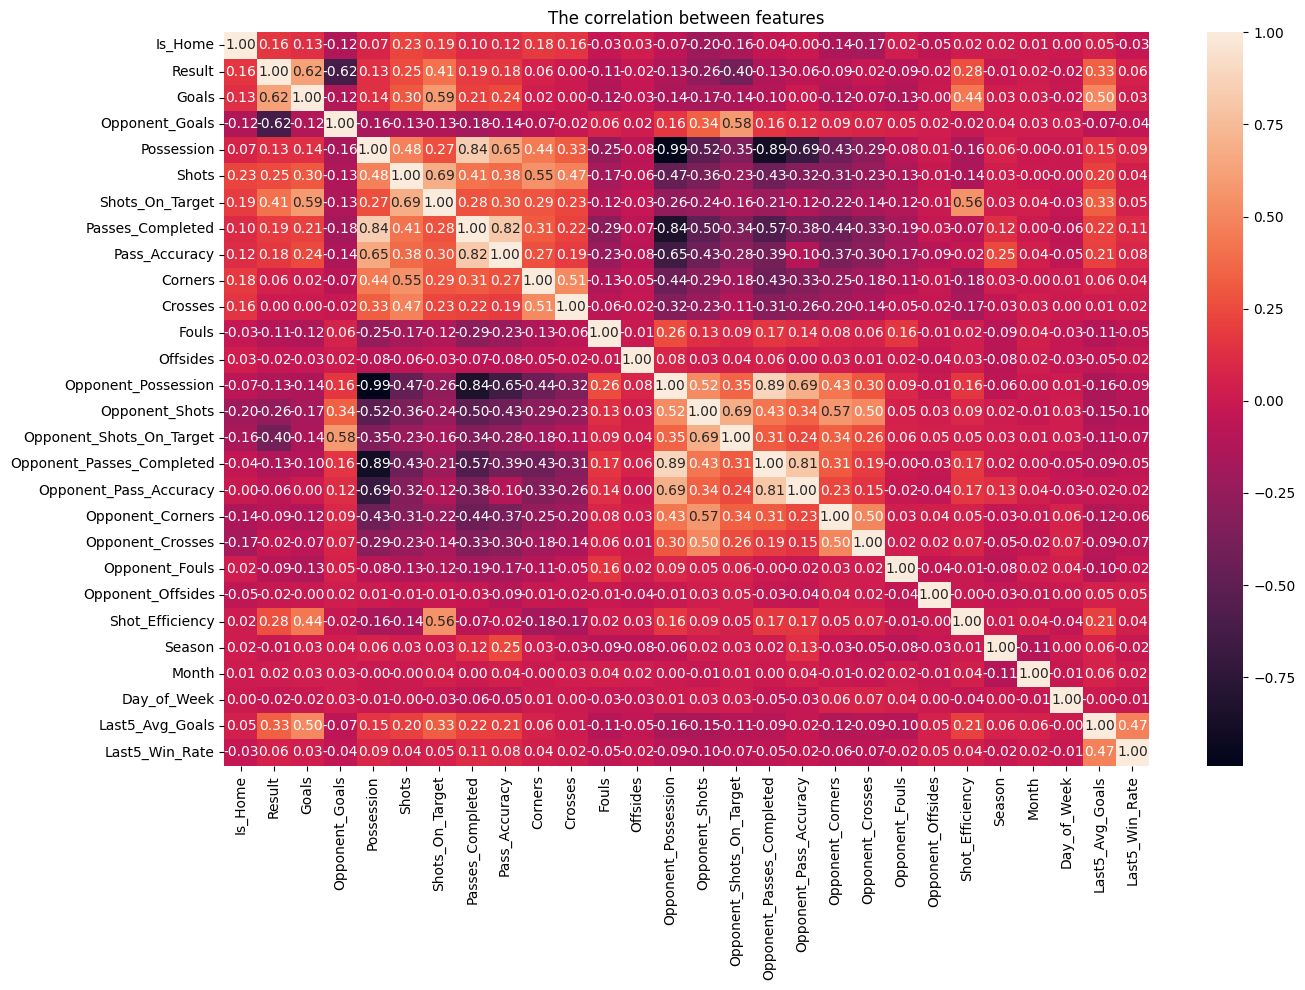

In [101]:
# Exploration of our data  (check the correlation between the features)
plt.figure(figsize=(14,10))
data_correlation=df.select_dtypes(include=[np.number])
correlation=data_correlation.corr()
sb.heatmap(correlation,annot=True,fmt='.2f')
plt.title("The correlation between features")
plt.tight_layout()
plt.show()



<Figure size 1400x1000 with 0 Axes>

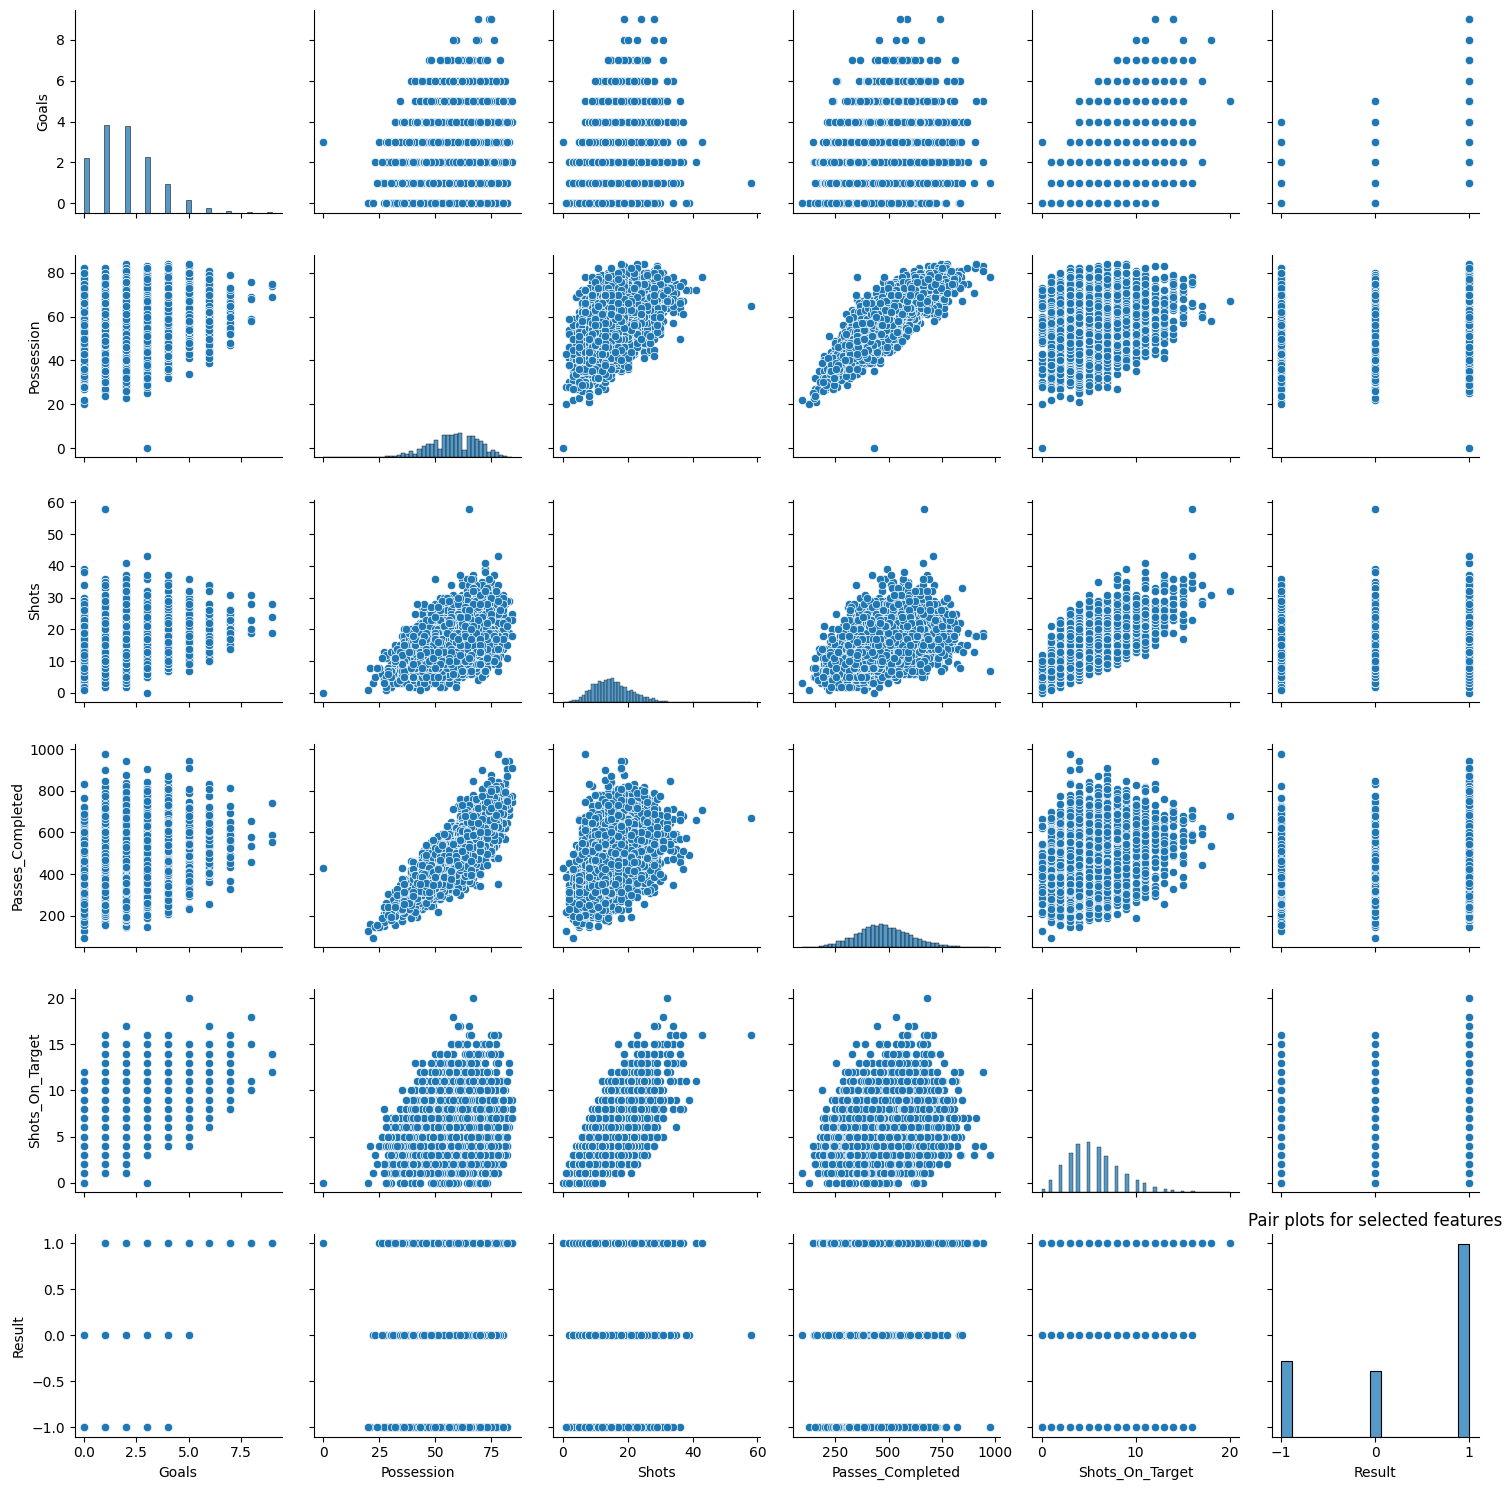

In [102]:
#Create pairplot between the features 
plt.figure(figsize=(14,10))
features=["Goals","Possession","Shots","Passes_Completed","Shots_On_Target","Result"]
features_data=df[features]
sb.pairplot(features_data)
plt.title("Pair plots for selected features")
plt.tight_layout()
plt.show()

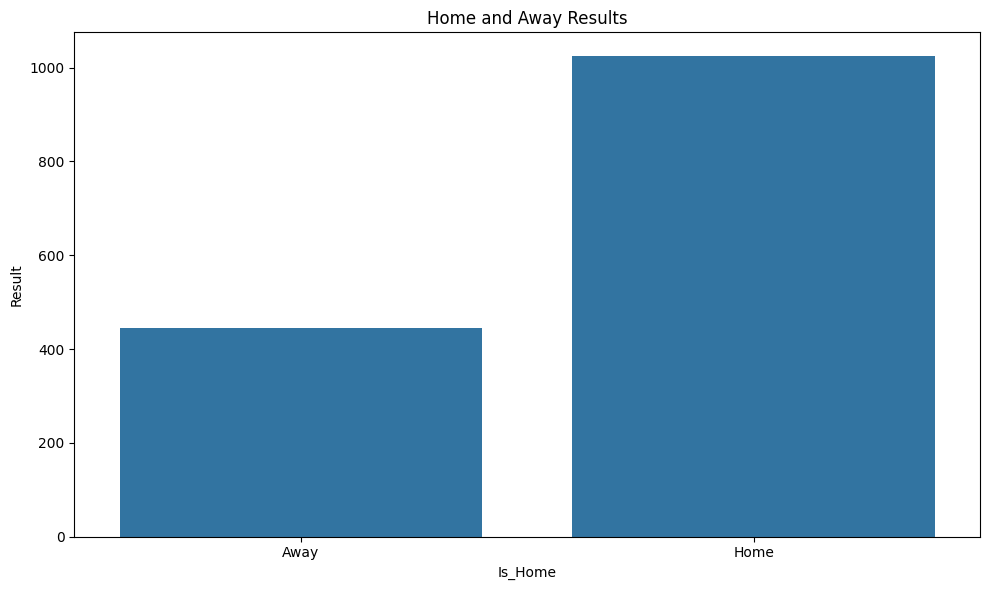

,Is_Home,Result
0,Away,444
1,Home,1024


In [103]:
# Home Vs Away and results
R=df.groupby("Is_Home")["Result"].sum().reset_index()
plt.figure(figsize=(10,6))
R["Is_Home"]=R["Is_Home"].replace({0:"Away",1:"Home"})
sb.barplot(x=R["Is_Home"],y=R["Result"])
plt.title("Home and Away Results")
plt.tight_layout()
plt.show()
R

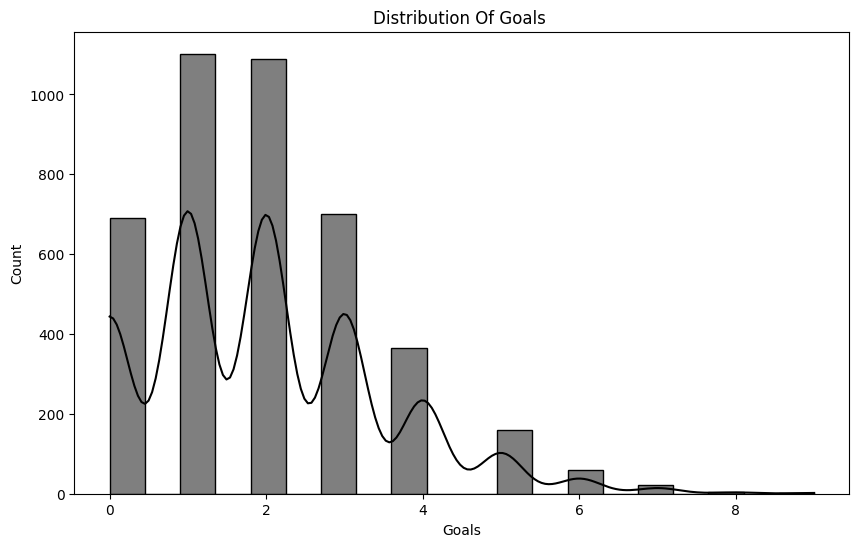

In [104]:
# Analys the distribution of goals 
plt.figure(figsize=(10,6))
sb.histplot(df["Goals"],kde=True,color='black',bins=20)
plt.title("Distribution Of Goals ")
plt.show()

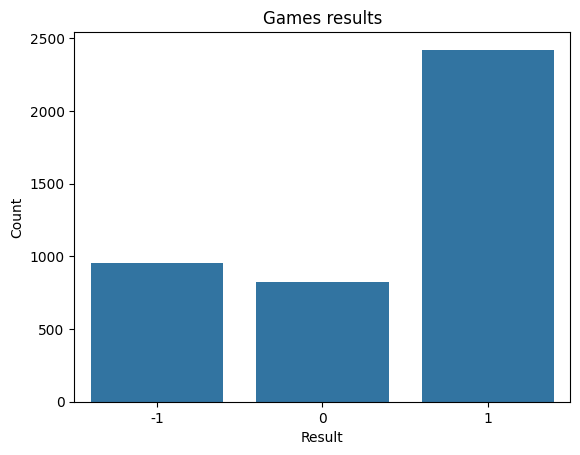

In [112]:
# Match result count
result_data=df.groupby("Result")["Team"].count().reset_index()
result_data.rename(columns={'Team':"Count"},inplace=True)
sb.barplot(x=result_data["Result"],y=result_data["Count"])
plt.title("Games results")
plt.xlabel("Result")
plt.ylabel("Count")
plt.tight_layout
plt.show()


In [106]:
# See the top team fouls and opponent fouls in every season 
foul_data=df[df["Season"]>=2013].groupby(["Season","Team"])[["Fouls","Opponent_Fouls"]].sum().reset_index()
for i in range(2013,2026):
    most_foul=foul_data[foul_data["Season"]==i]["Fouls"].max()
    most_o_foul=foul_data[foul_data["Season"]==i]["Opponent_Fouls"].max()
    most_team=foul_data[(foul_data["Season"]==i) & (foul_data["Fouls"]==most_foul)]["Team"].iloc[0]
    most_oteam=foul_data[(foul_data["Season"]==i) & (foul_data["Opponent_Fouls"]==most_o_foul)]["Team"].iloc[0]
    print(f"The team who has the most fouls in {i} with {most_foul} fouls is {most_team} || The team who has the most opponent fouls in {i} with {most_o_foul} opponent fouls is {most_oteam} .")


foul_data

The team who has the most fouls in 2013 with 468 fouls is Tottenham || The team who has the most opponent fouls in 2013 with 478 opponent fouls is Tottenham .
The team who has the most fouls in 2014 with 707 fouls is Chelsea || The team who has the most opponent fouls in 2014 with 792 opponent fouls is Chelsea .
The team who has the most fouls in 2015 with 691 fouls is Liverpool || The team who has the most opponent fouls in 2015 with 779 opponent fouls is Chelsea .
The team who has the most fouls in 2016 with 784 fouls is Manchester United || The team who has the most opponent fouls in 2016 with 791 opponent fouls is Liverpool .
The team who has the most fouls in 2017 with 934 fouls is Manchester United || The team who has the most opponent fouls in 2017 with 875 opponent fouls is Manchester United .
The team who has the most fouls in 2018 with 681 fouls is Manchester United || The team who has the most opponent fouls in 2018 with 739 opponent fouls is Chelsea .
The team who has the m

,Season,Team,Fouls,Opponent_Fouls
0,2013,Arsenal,348,364
1,2013,Chelsea,201,186
2,2013,Liverpool,116,117
3,2013,Manchester City,173,133
4,2013,Manchester United,143,160
...,...,...,...,...
73,2025,Chelsea,153,162
74,2025,Liverpool,217,190
75,2025,Manchester City,142,167
76,2025,Manchester United,204,210


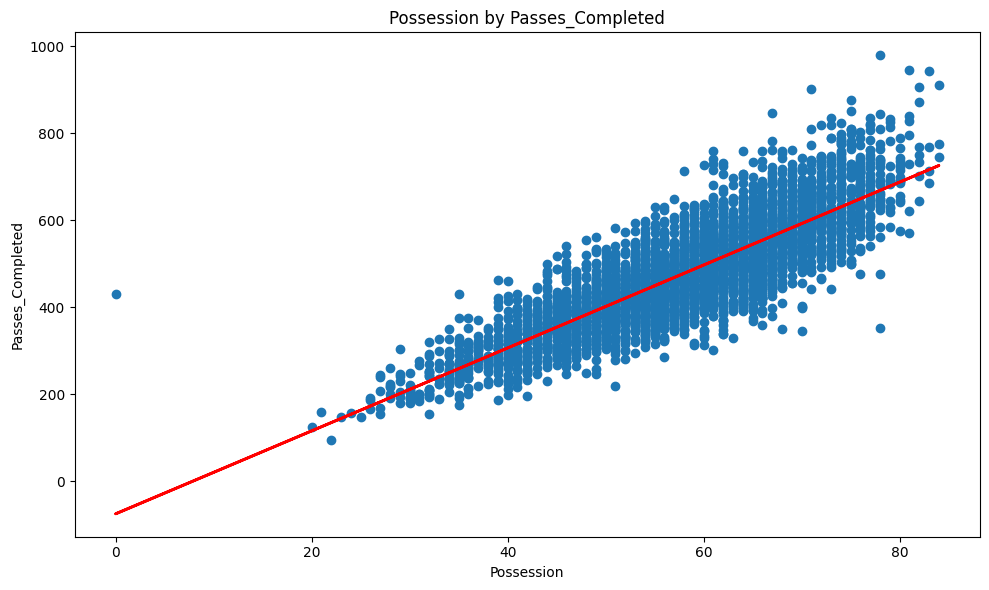

In [107]:
# Possession by Passes_Completed
possesion=df["Possession"]
passes=df["Passes_Completed"]
a,b=np.polyfit(possesion,passes,1)
plt.figure(figsize=(10,6))
plt.plot(possesion,a*possesion + b,c='red',linewidth=2)
plt.scatter(possesion,passes)
plt.title("Possession by Passes_Completed")
plt.xlabel("Possession")
plt.ylabel("Passes_Completed")
plt.tight_layout()
plt.show()


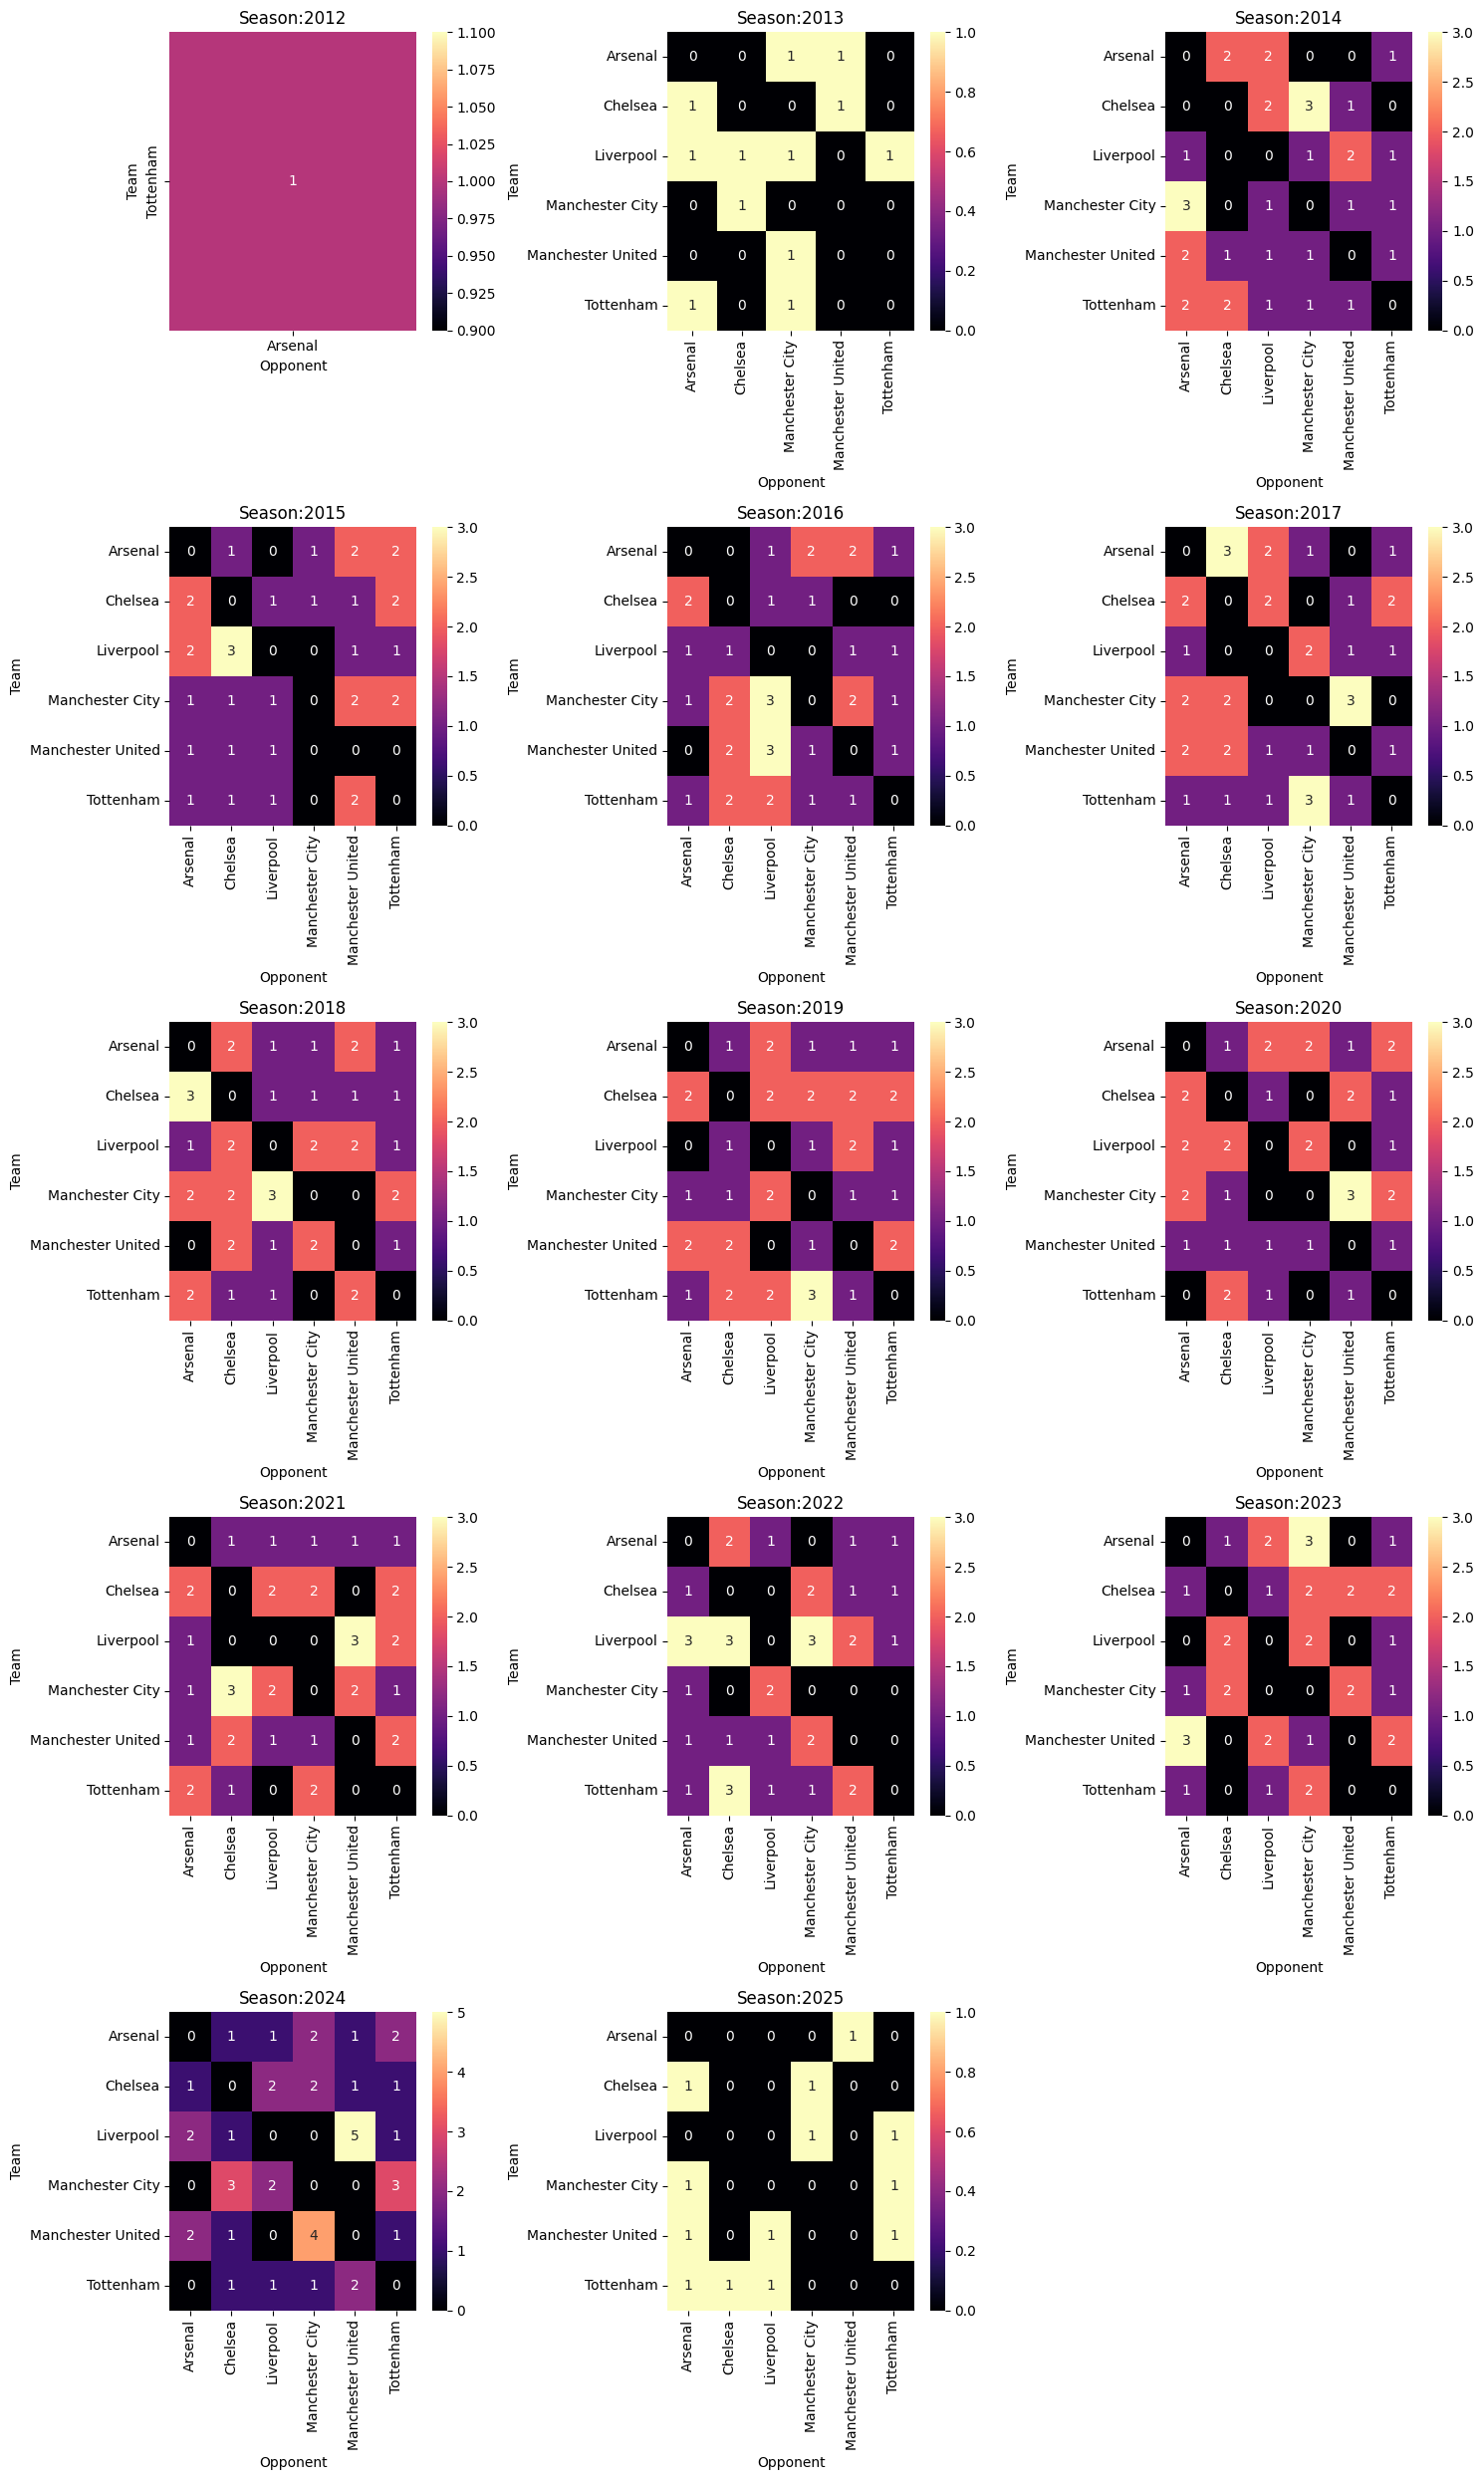

In [108]:
teams=["Manchester City","Manchester United","Chelsea","Arsenal","Liverpool","Tottenham"]
filtred_data=df[df["Team"].isin(teams) & df["Opponent"].isin(teams)]
seasons=sorted(filtred_data["Season"].unique())
n_columns=3
n_rows=(n_columns + len(seasons) - 1)//n_columns
fig,axes=plt.subplots(n_rows,n_columns,figsize=(n_columns*5,n_rows*5))
axes=axes.flatten()
for i,s in enumerate(seasons):
    df_seasons=filtred_data[filtred_data["Season"]==s]
    matches=df_seasons.groupby(["Team","Opponent"]).size().reset_index(name="Matches") # Size to see how match vs 
    matrix=matches.pivot(index="Team",columns="Opponent",values="Matches").fillna(0)
    sb.heatmap(matrix,cmap='magma',fmt='.0f',ax=axes[i],annot=True)
    axes[i].set_title(f"Season:{s}")
for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])                            


plt.tight_layout()
plt.show()


In [109]:
# Developped statistics
df_new=filtred_data[["Team","Opponent","Goals","Opponent_Goals","Result","Possession","Opponent_Possession"]].value_counts().reset_index()
df_new=df_new.rename(columns={"Result":"Result Team"})
df_new


,Team,Opponent,Goals,Opponent_Goals,Result Team,Possession,Opponent_Possession,count
0,Liverpool,Manchester City,1,1,0,40,60,2
1,Chelsea,Arsenal,1,2,-1,48,52,2
2,Chelsea,Manchester United,1,1,0,48,52,2
3,Manchester City,Manchester United,0,2,-1,50,50,2
4,Chelsea,Liverpool,1,1,0,45,55,2
...,...,...,...,...,...,...,...,...
441,Arsenal,Liverpool,1,5,-1,57,43,1
442,Arsenal,Liverpool,2,2,0,36,64,1
443,Arsenal,Liverpool,2,2,0,41,59,1
444,Arsenal,Liverpool,3,3,0,40,60,1


In [110]:
# Number of matches between the teams 
copy_data=df_new.copy()
copy_data["Teams_sorted"]=copy_data.apply(
    lambda row: tuple(sorted([row["Team"],row["Opponent"]])) ,axis=1
)
vs_match=copy_data.groupby("Teams_sorted")["count"].sum().reset_index()
vs_match[["Team 1","Team 2"]]=pd.DataFrame(vs_match["Teams_sorted"].tolist(),index=vs_match.index)
vs_match=vs_match.drop(columns=["Teams_sorted"])
vs_match=vs_match.rename(columns={"count":"Number of matches"})
vs_match.sort_values("Number of matches").reset_index()

,index,Number of matches,Team 1,Team 2
0,14,26,Manchester United,Tottenham
1,11,27,Liverpool,Tottenham
2,7,28,Chelsea,Manchester United
3,3,29,Arsenal,Manchester United
4,4,29,Arsenal,Tottenham
5,13,30,Manchester City,Tottenham
6,1,30,Arsenal,Liverpool
7,5,31,Chelsea,Liverpool
8,9,31,Liverpool,Manchester City
9,8,31,Chelsea,Tottenham


In [111]:
df_copy=filtred_data.copy()
df_copy["Teams_sorted"]=df_copy.apply(
    lambda row : tuple(sorted([row["Team"],row["Opponent"]])),axis=1
)
def points_team(row):
    team1,team2=sorted([row["Team"],row["Opponent"]])
    if row["Team"]==team1:
        points_team1=3 if row["Result"]==1 else 1 if row["Result"]==0 else 0
        points_team2=3 if row["Result"]==-1 else 1 if row["Result"]==0 else 0
    else:
        points_team2=3 if row["Result"]==1 else 1 if row["Result"]==0 else 0
        points_team1=3 if row["Result"]==-1 else 1 if row["Result"]==0 else 0
    return pd.Series([points_team1,points_team2])
df_copy[["Points_team1","Points_team2"]]=df_copy.apply(points_team,axis=1)

def win_team(row):
    team1,team2=sorted([row["Team"],row["Opponent"]])
    win1=1 if ((row["Result"]==1 and row["Team"]==team1) or (row["Result"]==-1 and row["Team"]==team2)) else 0
    win2=1 if ((row["Result"]==1 and row["Team"]==team2) or (row["Result"]==-1 and row["Team"]==team1)) else 0
    draw=1 if row["Result"]==0 else 0
    return pd.Series([win1,win2,draw])
df_copy[["win_1","win_2","draws"]]=df_copy.apply(win_team,axis=1)
Summary=df_copy.groupby("Teams_sorted").agg(
    number_of_matches=("Result",'count'),
    Goals_team1=("Goals",'sum'),
    Goals_team2=("Opponent_Goals",'sum'),
    Points_team1=("Points_team1",'sum'),
    Points_team2=("Points_team2",'sum'),
    win_team1=("win_1",'sum'),
    win_team2=("win_2",'sum'),
    Draws=("draws",'sum')
).reset_index()
Summary[["Team1","Team2"]]=pd.DataFrame(Summary["Teams_sorted"].tolist(),index=Summary.index)
Summary=Summary.drop(columns=["Teams_sorted"])
Summary

,number_of_matches,Goals_team1,Goals_team2,Points_team1,Points_team2,win_team1,win_team2,Draws,Team1,Team2
0,35,31,64,52,43,14,11,10,Arsenal,Chelsea
1,30,44,65,27,51,5,13,12,Arsenal,Liverpool
2,31,39,61,31,55,8,16,7,Arsenal,Manchester City
3,29,32,45,44,35,12,9,8,Arsenal,Manchester United
4,29,31,50,49,31,14,8,7,Arsenal,Tottenham
5,31,33,36,41,38,9,8,14,Chelsea,Liverpool
6,35,41,54,35,65,10,20,5,Chelsea,Manchester City
7,28,25,40,36,36,8,8,12,Chelsea,Manchester United
8,31,36,54,63,24,19,6,6,Chelsea,Tottenham
9,31,37,63,51,33,14,8,9,Liverpool,Manchester City
